In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Specify the file path in your Google Drive
file_path = '/content/drive/MyDrive/soccer21-22[1].csv'

# Read the dataset into a DataFrame
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Data Preprocessing
# Assuming you have columns: HomeTeam, AwayTeam, FTHG, FTAG, FTR, HTHG, HTAG, HTR, Referee, HS, AS, HST, AST, HF, AF, HC, AC, HY, AY, HR, AR
# You may need to preprocess categorical variables (HomeTeam, AwayTeam, FTR, HTR, Referee) using label encoding
label_encoder = LabelEncoder()
df['HomeTeam'] = label_encoder.fit_transform(df['HomeTeam'])
df['AwayTeam'] = label_encoder.fit_transform(df['AwayTeam'])
df['FTR'] = label_encoder.fit_transform(df['FTR'])
df['HTR'] = label_encoder.fit_transform(df['HTR'])
df['Referee'] = label_encoder.fit_transform(df['Referee'])

In [6]:
# Train-Test Split
X = df[['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR']]
y = df['FTR']  # Assuming you want to predict the full-time result
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred_linear_reg = linear_reg_model.predict(X_test)

mse_linear_reg = mean_squared_error(y_test, y_pred_linear_reg)
mae_linear_reg = mean_absolute_error(y_test, y_pred_linear_reg)
r2_linear_reg = r2_score(y_test, y_pred_linear_reg)

In [9]:
print("Regression Metrics:")
print("Mean Squared Error:", mse_linear_reg)
print("Mean Absolute Error:", mae_linear_reg)
print("R-squared:", r2_linear_reg)



Regression Metrics:
Mean Squared Error: 0.18872108354286532
Mean Absolute Error: 0.34309813469357336
R-squared: 0.750159757381712


In [10]:
# Random Forest Classification
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

RandomForestClassifier()

In [11]:
y_pred_cls = random_forest_model.predict(X_test)

accuracy_cls = accuracy_score(y_test, y_pred_cls)
print("Accuracy (RandomForest Classification):", accuracy_cls)

Accuracy (RandomForest Classification): 0.9078947368421053


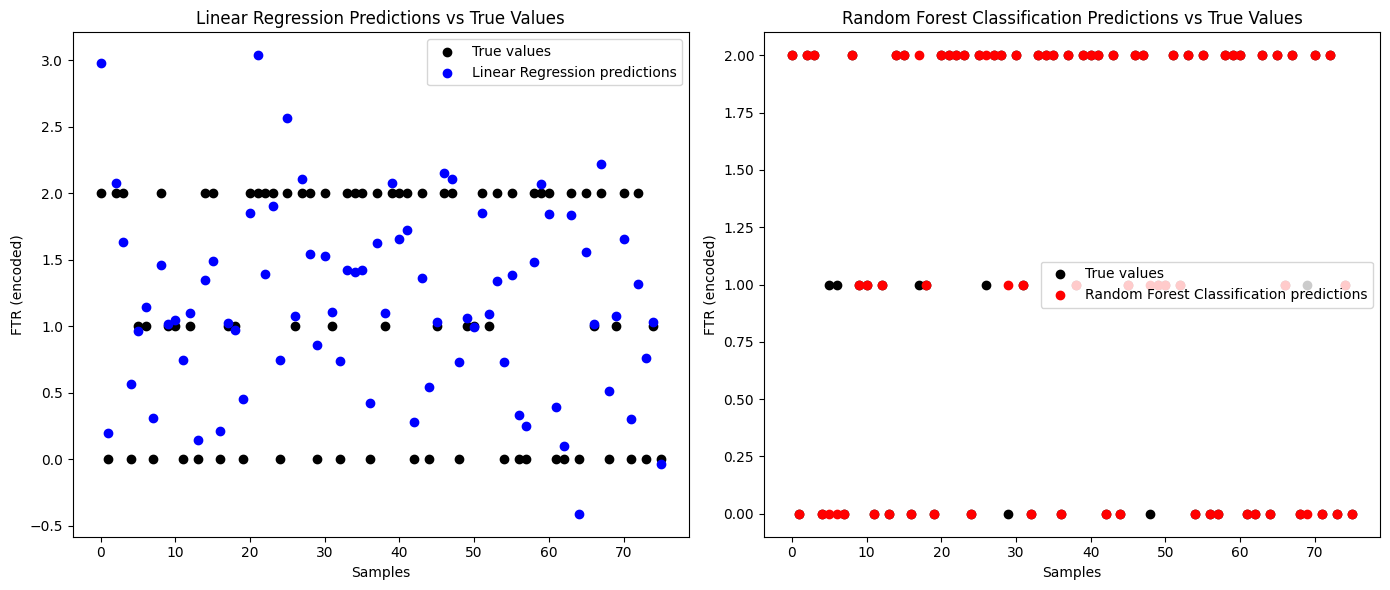

In [12]:
import numpy as np
# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Linear Regression Predictions Plot
ax1 = axes[0]
ax1.scatter(range(len(y_test)), y_test, color='black', label='True values')
ax1.scatter(range(len(y_test)), y_pred_linear_reg, color='blue', label='Linear Regression predictions')
ax1.set_xlabel('Samples')
ax1.set_ylabel('FTR (encoded)')
ax1.set_title('Linear Regression Predictions vs True Values')
ax1.legend()

# Random Forest Classification Predictions Plot
ax2 = axes[1]
ax2.scatter(range(len(y_test)), y_test, color='black', label='True values')
ax2.scatter(range(len(y_test)), y_pred_cls, color='red', label='Random Forest Classification predictions')
ax2.set_xlabel('Samples')
ax2.set_ylabel('FTR (encoded)')
ax2.set_title('Random Forest Classification Predictions vs True Values')
ax2.legend()

plt.tight_layout()
plt.show()





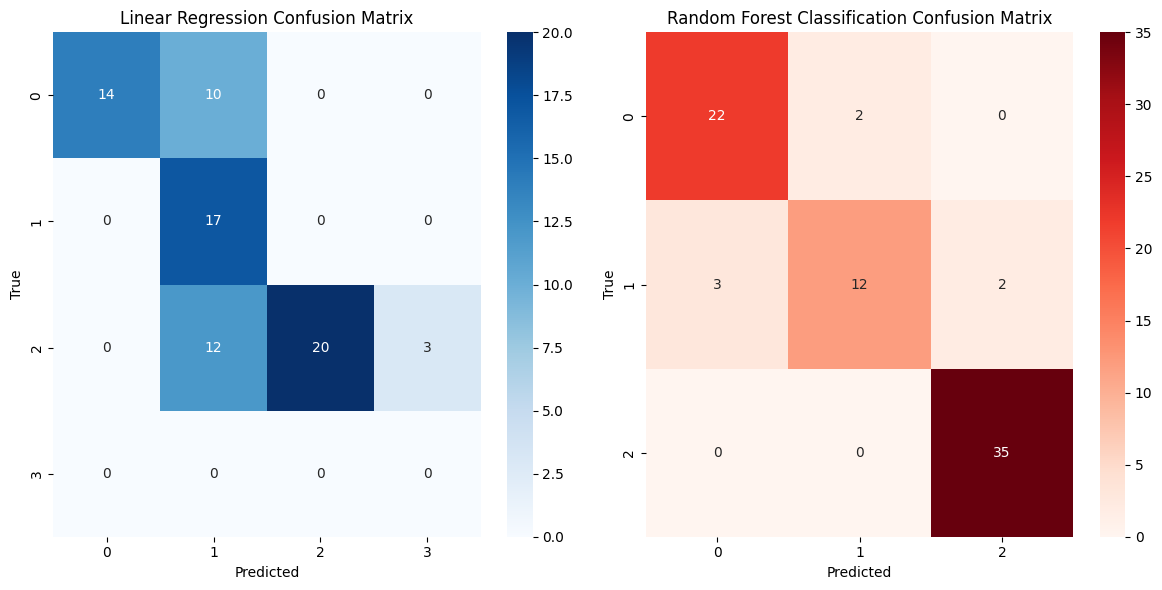

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrices
cm_linear_reg = confusion_matrix(y_test, np.round(y_pred_linear_reg))
cm_random_forest = confusion_matrix(y_test, y_pred_cls)

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Linear Regression Confusion Matrix
ax1 = axes[0]
sns.heatmap(cm_linear_reg, annot=True, cmap='Blues', fmt='g', ax=ax1)
ax1.set_title('Linear Regression Confusion Matrix')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('True')

# Random Forest Classification Confusion Matrix
ax2 = axes[1]
sns.heatmap(cm_random_forest, annot=True, cmap='Reds', fmt='g', ax=ax2)
ax2.set_title('Random Forest Classification Confusion Matrix')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('True')

plt.tight_layout()
plt.show()

